Standart olan kütüphaneleri import etme, veri setlerini çağırma ve gerekli düzenlemeleri yapma işlemlerini gerçekleştirelim.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
median_house_hold_in_come = pd.read_csv("MedianHouseholdIncome2015.csv", encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv("PercentOver25CompletedHighSchool.csv", encoding="windows-1252")
share_race_city = pd.read_csv("ShareRaceByCity.csv", encoding="windows-1252")
kill = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")

In [3]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)

In [4]:
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

Eyaletlerdeki 25 yaşından büyük insanların liseden mezun olma oranlarını görselleştirelim.

Öncelikle veri setini inceleyelim.

In [5]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


Yukarıda çıktıya baktığımızda, eyaletler, şehirleri ve liseden mezun olma oranları bilgilerini görmekteyiz.

Veri seti içerisinde hatalı bir data olup olmadığına bakalım.

In [6]:
percent_over_25_completed_highSchool.percent_completed_hs.value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
39.3       1
20.1       1
27.2       1
36.8       1
43.9       1
Name: percent_completed_hs, Length: 728, dtype: int64

Çıktıda görüldüğü üzere 197 tane - değeri var. Bu değerin anlamı bilinmemektedir. Dolayısıyla - değerini 0 değerine çevirelim ve bu işlemi - değerine ait oranı atmak gibi düşünebiliriz.

In [7]:
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)

Yukarıda veri setinin percent_completed_hs sütununda - yerine 0 yazdırma işlemini yaptım. inplace = True parametresinden dolayı yapılan işlemi veri setinin üzerine yazarak işlemi kalıcılaştırdım.

info metodu ile veri setinde istemediğimiz başka durumların olup olmadığını inceleyelim.

In [8]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


percent_completed_hs sütunu oran değerlerini tutuyor fakat bu sütundaki değerlerin veri tipinin string olduğunu çıktıda görüyoruz. Dolayısıyla bu sütunu float'a çevirmeliyiz.

In [9]:
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)

Şimdi de kaç farklı eyalet var ise hepsini bir listede depolayalım.

In [10]:
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())

Sonra, bu listenin içerisinde dolaşarak unique olan eyaletleri bulup bu eyaletleri filtreleyelim ve x değişkenine eşitleyelim. Daha sonrada liseyi tamamlayanları alarak ortalamasını bulalım. Ve bu değerleri area_highschool isimli listenin içerisinde depolayalım.

In [11]:
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)

Sıralanmamış bir data elde ettik. Grafikte daha anlaşılabilir bir görünüm elde etmek amacıyla veriyi sıralayalım.

In [12]:
# sorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)

ascending=True parametresinden dolayı artan bir sırada sıralama gerçekleştirilmiştir.

new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values  satırda artan sırada bir sıralama yapılıp, bu sıralamanın indeksleri elde edilmiştir. Bu işlemi filtremiz olarak nitelendirebiliriz.

sorted_data2 = data.reindex(new_index) satırı ile data'nın hepsini sıralamış olduk.

Text(0.5, 1.0, "Percentage of Given State's Population Above 25 that Has Graduated High School")

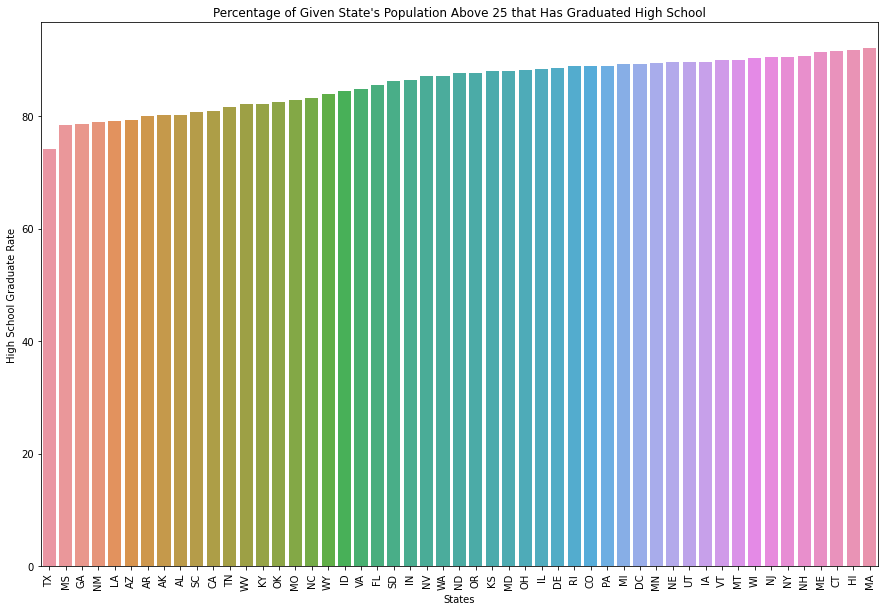

In [13]:
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

Yukarıdaki bloğu açıklayayım. Eni 15 ve boyu 10 boyutunda olan bir figür oluşturdum. 

sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio']) satırı ile, x eksenine sıralanan eyaletler yerleştirilmiştir ve y eksenine eyaletlere karşılık gelen liseden mezun olma oranları yerleştirilmiştir.

plt.xticks(rotation= 90) satırı ile x ekseninde yazan eyalet isimlerinin düz,çapraz gibi konumunu ayarladım. 90 derece yaparak eyalet isimlerinin dik bir şekilde düz olmasını sağladım.

Çıktıdaki grafiği okuyalım. Eyaletlerden liseden mezun olma oranı en düşük olan TX 'dir. Yaklaşık olarak 75 değerine sahiptir.
En yüksek orana sahip olan ise MA eyaletidir.

Böylelikle bir problem belirleyip bu problemi görselleştirdik.